# Groupby and apply
Powerful data query mechanisms
see '3.13 Grouping Rows by Values' in Albon

## Load a dataset

In [3]:
# !mamba install seaborn -y

In [4]:
import pandas as pd
import seaborn as sns
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
# url="https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv"  #404 now
df = pd.read_csv(url)

In [5]:
#how many rows in DataFrame
print(len(df))

#look at first few
df.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#lets see what type of data is in each column
df.dtypes
#what are the categorical variables?  Which are nominal and which ordinal?

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.Survived.unique()

array([0, 1])

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## 'Groupby' allows you to separate your data by some selector or combination of selectors and then apply a function over each of these groups to calculate a statistic.

The function will only apply to the fields where it makes sense (which means numerical data.)


## Lets see who survived based on Sex.  
I'm grouping all the rows by sex, and then adding up all the values in numerical fields

In [9]:
#this is a groupby object, you can't do anything with it until you apply a function to it
gb = df.groupby('Sex')
print(type(gb))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [11]:
def fun(df):
    print(df.shape)

gb.apply(fun, include_groups=False)

(314, 11)
(577, 11)


""


In [ ]:
#after applying a function to the groupby object you get a dataframe
df1=df.groupby('Sex').sum()
print(type(df1))
df1

In [ ]:
# adding up Ages is not helpful, neither is SexCode, lets just see who survived
df1.Survived
# df1.iloc[:,1]  #same as above

In [ ]:
# Note that this DataFrame has summary stats only, it's not hiding any of the other data
df1.shape

## Lets see who survived based on Sex and PClass.  

In [ ]:
df.Pclass.unique()

In [ ]:
#how many people in each class (lived and died)?
df.groupby(['Sex','Pclass']).Survived.count()

In [ ]:
#how many people in each class survived
df2=df.groupby(['Sex','Pclass']).sum()
df2



In [ ]:
df2.iloc[:,1] #survived column, Sex and pclass are the indices
# df2.shape

In [ ]:
#want to select just 1 row from above multiindexed dataframe?
#first need to know how to get the index, ask for it
df2.index

In [ ]:
#to get the first row
df2.loc[[('female',1)]]

## You do not have to use the built in functions for groupby.  You can make your own.
Use groupby's apply() method, <mark>It takes a DataFrame and returns a DataFrame, or a Series or scaler

In [ ]:
df.groupby('Sex').count()

In [ ]:
#lets find the oldest male and female
def fun1(df):
    # print(df.shape)  #how big is it?
    #this function finds the oldest male and female passenger
    #sort by age, this returns a series with just age
    # return (df.Age.sort_values(ascending=False).iloc[0])

    #sort by age, return the name and age column
    
    #using iloc with just numbers (which column is Age and Name?)
    # return (df.sort_values(by='Age',ascending=False).iloc[0,[3,5]])
    
    #dont like the 3,5? get the columns by name
    # return (df.sort_values(by='Age',ascending=False).iloc[0,[df.columns.get_loc(c) for c in ['Name', 'Age']]])
    
    #or use the slower loc with column names (note the funky way to get row 0, make sure you sort it as well or you get the wrong answer)
    return (df.sort_values(by='Age',ascending=False).loc[df.sort_values(by='Age',ascending=False).index[0],['Name','Age']])
   
#BTW you are calling apply on a groupby object which does not have an apply method.        
df.groupby('Sex').apply(fun1)

In [ ]:
#lets find the oldest male and female, who died and survived 
def fun1(df):
    #this function finds the oldest male and female passenger
    #sort by age, this returns a series with just age
    # return (df.Age.sort_values(ascending=False).iloc[0])

    #sort by age, return the name and age column
    return (df.sort_values(by='Age',ascending=False).iloc[0,[3,5]])
    # return (df.sort_values(by='Age',ascending=False).loc[df.sort_values(by='Age',ascending=False).index[0],['Name','Age']])


df1=df.groupby(['Sex','Survived']).apply(fun1)
df1

In [ ]:
#what to use to dereference
df1.index

In [ ]:
# df1.query("Sex=='female' & Survived==0")
df1.loc[('female',1)]

## Does gender or passenger class affect your chances?

We want percentages here not absolute numbers, for instance number of femal 1st class passengers who survived divided by total number of female first class passengers.


In [ ]:
#survival based on class
def fun3(df):
    #each dataframe passed to this function will contain 
    #all rows of 1 gender (M,F) in one of the PClasses (1st, 2nd, 3rd) 
    #just divide the len of the dataframe by the number who survived to see
    #survival rate
    return df.Survived.sum()/len(df)


res=df.groupby(['Sex','Pclass']).apply(fun3)
res

In [ ]:
#can also do it this way
tmp=df.groupby(['Sex','Pclass'])   #create a groupby object
tmp.sum().loc[:,'Survived']/tmp.Survived.count()  #divide total number survivors by total number

## I would like to graph this but my indexes are a pain, reset_index to the rescue!
It will create a dataframe from this Series and save the multiindex as columns

In [ ]:
res1=res.reset_index()
res1

In [ ]:
res1 = res1.rename(columns = {0 : 'Survival rate %'})
res1['Survival rate %'] = res1['Survival rate %']*100
res1.columns
res1

In [ ]:
res1.dtypes

In [65]:
#convert % to string so seaborn does not fail when printing the legend below
res1['Pclass']=res1['Pclass'].astype(str)

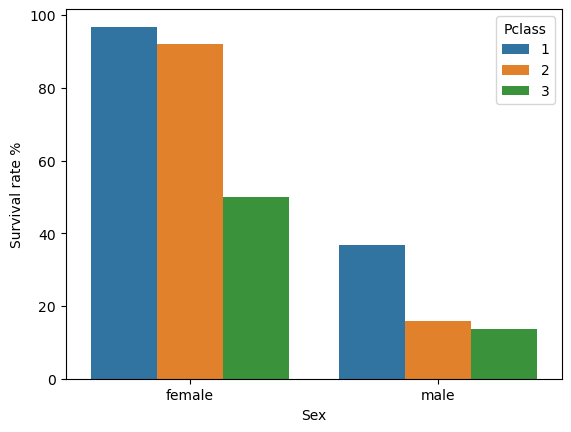

In [66]:
#want to filter the seaborn warnings
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

#btw check seaborn version
#sns.__version__
#if you look online you se that the warnings are fixed in 0.13.0

#lets graph this, oh no? what to do with the index?  And what I have is a series
sns.barplot(data=res1,x="Sex",y='Survival rate %',  hue="Pclass" );